# 💰 Total Cost Prediction: Irrigation System Comparison

This notebook predicts and analyzes the **average total cost differences** between irrigation system types.

**Analysis includes:**
- Calculate total farming costs per system
- Predict average cost differences
- Confidence intervals for predictions
- Cost breakdown by category
- Recommendation engine

**Note**: Column names are in lowercase.

---

## 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configure settings
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


In [2]:
# Load dataset
df = pd.read_excel('Irrigation_DS_Clean.xlsx')

print("✓ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Display first few column names to verify lowercase
print(f"\nFirst 10 column names (verification):")
for i, col in enumerate(df.columns[:10], 1):
    print(f"{i:2d}. {col}")

✓ Dataset loaded successfully!
Shape: 30 rows × 55 columns

First 10 column names (verification):
 1. survey_date
 2. governorate
 3. district
 4. village_name
 5. irrigation_system_type
 6. crop_type
 7. land_prep_plowing_cost_per_acre
 8. land_prep_settlement_cost_per_acre
 9. land_prep_division_cost_per_acre
10. land_prep_terracing_cost_per_acre


## 2. Identify Cost Columns

In [3]:
# Identify major cost columns (lowercase)
major_cost_columns = [
    'land_prep_grand_total_cost',
    'nursery_prep_total_cost',
    'cultivation_labor_total_cost',
    'fertilizer_total_cost',
    'production_final_harvest_cost_yer',
    'pest_control_grand_total_cost',
    'water_grand_total_cost'
]

# Check which columns exist in the dataset
existing_cost_cols = [col for col in major_cost_columns if col in df.columns]

print("Major Cost Categories Found:")
print("=" * 100)
for i, col in enumerate(existing_cost_cols, 1):
    print(f"{i}. {col.replace('_', ' ').title()}")

print(f"\nTotal cost categories: {len(existing_cost_cols)}")

if len(existing_cost_cols) == 0:
    print("\n⚠ Warning: No cost columns found! Please check column names.")

Major Cost Categories Found:
1. Land Prep Grand Total Cost
2. Nursery Prep Total Cost
3. Cultivation Labor Total Cost
4. Fertilizer Total Cost
5. Production Final Harvest Cost Yer
6. Pest Control Grand Total Cost
7. Water Grand Total Cost

Total cost categories: 7


## 3. Calculate Total Cost Per Farm

In [4]:
# Calculate total cost for each farm
print("Calculating Total Farming Cost per Farm...")
print("=" * 100)

# Sum all cost columns for each row
df['total_farming_cost'] = df[existing_cost_cols].sum(axis=1)

print("✓ Total farming cost calculated!")
print(f"\nTotal Cost Statistics (All Farms):")
print(f"  • Mean: {df['total_farming_cost'].mean():,.2f} YER")
print(f"  • Median: {df['total_farming_cost'].median():,.2f} YER")
print(f"  • Std Dev: {df['total_farming_cost'].std():,.2f} YER")
print(f"  • Min: {df['total_farming_cost'].min():,.2f} YER")
print(f"  • Max: {df['total_farming_cost'].max():,.2f} YER")

# Show breakdown
print(f"\nCost Breakdown (Average across all farms):")
print("-" * 100)
for col in existing_cost_cols:
    avg_cost = df[col].mean()
    pct = (avg_cost / df['total_farming_cost'].mean()) * 100
    print(f"  • {col.replace('_', ' ').title():40s}: {avg_cost:>10,.2f} YER ({pct:>5.1f}%)")

Calculating Total Farming Cost per Farm...
✓ Total farming cost calculated!

Total Cost Statistics (All Farms):
  • Mean: 462,974.00 YER
  • Median: 280,700.00 YER
  • Std Dev: 666,821.53 YER
  • Min: 108,680.00 YER
  • Max: 3,824,520.00 YER

Cost Breakdown (Average across all farms):
----------------------------------------------------------------------------------------------------
  • Land Prep Grand Total Cost              :  49,466.67 YER ( 10.7%)
  • Nursery Prep Total Cost                 :  77,920.00 YER ( 16.8%)
  • Cultivation Labor Total Cost            :  23,936.67 YER (  5.2%)
  • Fertilizer Total Cost                   :  39,973.33 YER (  8.6%)
  • Production Final Harvest Cost Yer       : 177,650.00 YER ( 38.4%)
  • Pest Control Grand Total Cost           :  29,013.33 YER (  6.3%)
  • Water Grand Total Cost                  :  76,857.33 YER ( 16.6%)


## 4. Total Cost by Irrigation System

In [5]:
# Group by irrigation system
irrigation_col = 'irrigation_system_type'

if irrigation_col in df.columns:
    print("TOTAL COST BY IRRIGATION SYSTEM")
    print("=" * 100)
    
    # Calculate statistics by system
    cost_by_system = df.groupby(irrigation_col)['total_farming_cost'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('median', 'median'),
        ('std', 'std'),
        ('min', 'min'),
        ('max', 'max'),
        ('total', 'sum')
    ]).round(2)
    
    display(cost_by_system)
    
    # Save for later use
    systems_stats = cost_by_system
else:
    print(f"⚠ Warning: '{irrigation_col}' column not found!")

TOTAL COST BY IRRIGATION SYSTEM


,count,mean,median,std,min,max,total
irrigation_system_type,,,,,,,
Drip,15,272126.67,257000.00,106109.54,108680.00,539480.00,4081900.00
Traditional,15,653821.33,375000.00,912005.92,158500.00,3824520.00,9807320.00


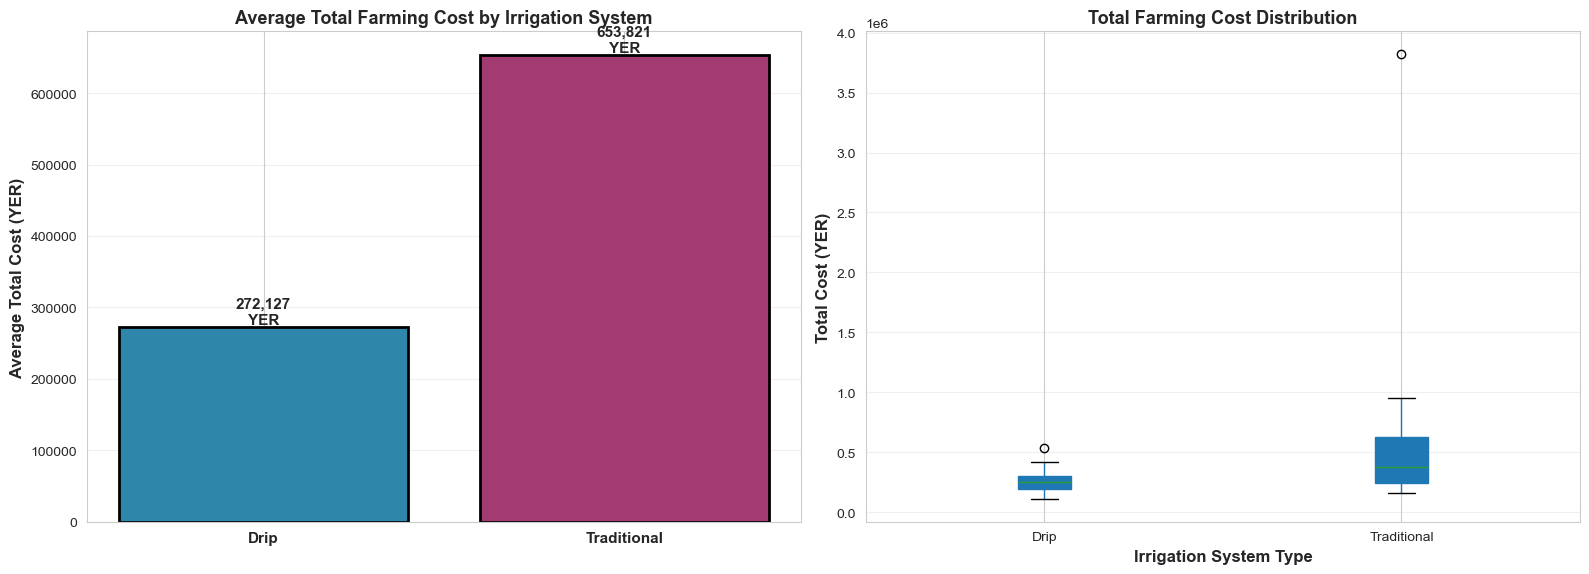

In [6]:
# Visualization: Total cost comparison
if irrigation_col in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart - Mean costs
    systems = df[irrigation_col].unique()
    mean_costs = df.groupby(irrigation_col)['total_farming_cost'].mean()
    
    colors = ['#2E86AB', '#A23B72']
    bars = axes[0].bar(range(len(mean_costs)), mean_costs.values, 
                       color=colors[:len(mean_costs)], edgecolor='black', linewidth=2)
    
    axes[0].set_xticks(range(len(mean_costs)))
    axes[0].set_xticklabels(mean_costs.index, fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Average Total Cost (YER)', fontsize=12, fontweight='bold')
    axes[0].set_title('Average Total Farming Cost by Irrigation System', 
                      fontsize=13, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}\nYER', ha='center', va='bottom', 
                    fontweight='bold', fontsize=11)
    
    # Box plot
    df.boxplot(column='total_farming_cost', by=irrigation_col, ax=axes[1], 
               patch_artist=True)
    axes[1].set_title('Total Farming Cost Distribution', fontsize=13, fontweight='bold')
    axes[1].set_xlabel('Irrigation System Type', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Total Cost (YER)', fontsize=12, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.suptitle('')  # Remove default title
    plt.tight_layout()
    plt.show()

## 5. Predict Cost Difference Between Systems

In [7]:
# Calculate predicted cost difference
print("=" * 100)
print("COST DIFFERENCE PREDICTION")
print("=" * 100)

if irrigation_col in df.columns:
    systems = df[irrigation_col].unique()
    
    if len(systems) == 2:
        system1, system2 = systems[0], systems[1]
        
        # Get data for each system
        costs_system1 = df[df[irrigation_col] == system1]['total_farming_cost']
        costs_system2 = df[df[irrigation_col] == system2]['total_farming_cost']
        
        # Calculate means
        mean1 = costs_system1.mean()
        mean2 = costs_system2.mean()
        
        # Predicted difference
        predicted_diff = mean1 - mean2
        
        # Standard errors
        se1 = costs_system1.std() / np.sqrt(len(costs_system1))
        se2 = costs_system2.std() / np.sqrt(len(costs_system2))
        se_diff = np.sqrt(se1**2 + se2**2)
        
        # 95% Confidence Interval for the difference
        ci_lower = predicted_diff - 1.96 * se_diff
        ci_upper = predicted_diff + 1.96 * se_diff
        
        # Percentage difference
        pct_diff = (predicted_diff / mean2) * 100
        
        print(f"\n{system1}:")
        print(f"  • Sample size: {len(costs_system1)}")
        print(f"  • Mean total cost: {mean1:,.2f} YER")
        print(f"  • Standard deviation: {costs_system1.std():,.2f} YER")
        print(f"  • Standard error: {se1:,.2f} YER")
        
        print(f"\n{system2}:")
        print(f"  • Sample size: {len(costs_system2)}")
        print(f"  • Mean total cost: {mean2:,.2f} YER")
        print(f"  • Standard deviation: {costs_system2.std():,.2f} YER")
        print(f"  • Standard error: {se2:,.2f} YER")
        
        print(f"\n" + "=" * 100)
        print("PREDICTED COST DIFFERENCE")
        print("=" * 100)
        
        print(f"\n🎯 Point Estimate:")
        print(f"  • Predicted difference: {predicted_diff:,.2f} YER")
        print(f"  • Percentage difference: {abs(pct_diff):.2f}%")
        
        if predicted_diff > 0:
            print(f"  • {system1} costs {abs(predicted_diff):,.2f} MORE than {system2}")
        else:
            print(f"  • {system1} costs {abs(predicted_diff):,.2f} LESS than {system2}")
        
        print(f"\n📊 95% Confidence Interval:")
        print(f"  • Lower bound: {ci_lower:,.2f} YER")
        print(f"  • Upper bound: {ci_upper:,.2f} YER")
        print(f"  • Margin of error: ±{1.96 * se_diff:,.2f} YER")
        
        print(f"\n💡 Interpretation:")
        print(f"  We can be 95% confident that the true average cost difference")
        print(f"  between {system1} and {system2} is between")
        print(f"  {ci_lower:,.2f} and {ci_upper:,.2f} YER.")
        
        # Save for visualization
        prediction = {
            'system1': system1,
            'system2': system2,
            'mean1': mean1,
            'mean2': mean2,
            'diff': predicted_diff,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'pct_diff': pct_diff
        }
    else:
        print(f"Found {len(systems)} irrigation systems. Analysis requires exactly 2.")
else:
    print(f"Column '{irrigation_col}' not found.")

COST DIFFERENCE PREDICTION

Traditional:
  • Sample size: 15
  • Mean total cost: 653,821.33 YER
  • Standard deviation: 912,005.92 YER
  • Standard error: 235,478.91 YER

Drip:
  • Sample size: 15
  • Mean total cost: 272,126.67 YER
  • Standard deviation: 106,109.54 YER
  • Standard error: 27,397.37 YER

PREDICTED COST DIFFERENCE

🎯 Point Estimate:
  • Predicted difference: 381,694.67 YER
  • Percentage difference: 140.26%
  • Traditional costs 381,694.67 MORE than Drip

📊 95% Confidence Interval:
  • Lower bound: -82,957.37 YER
  • Upper bound: 846,346.70 YER
  • Margin of error: ±464,652.03 YER

💡 Interpretation:
  We can be 95% confident that the true average cost difference
  between Traditional and Drip is between
  -82,957.37 and 846,346.70 YER.


## 6. Visualize Prediction with Confidence Interval

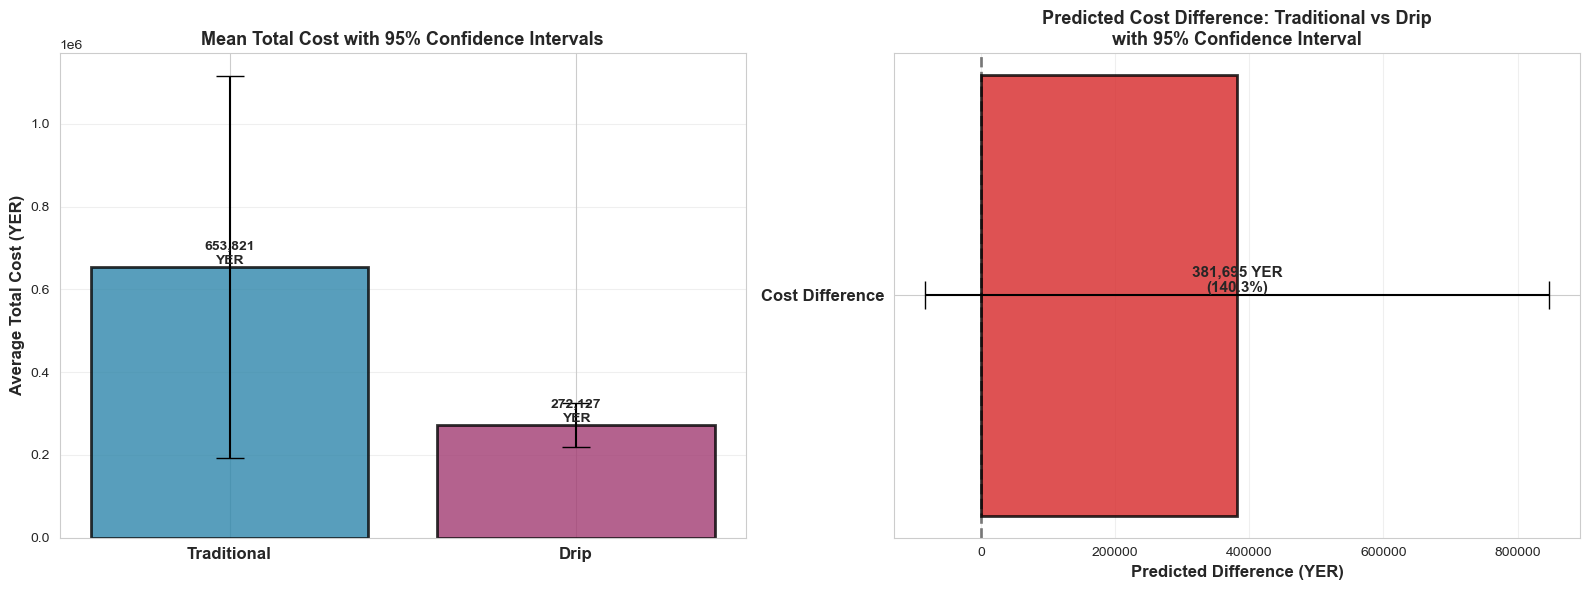

In [ ]:
# Visualization of prediction
if 'prediction' in locals():
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Left plot: Mean costs with error bars
    systems = [prediction['system1'], prediction['system2']]
    means = [prediction['mean1'], prediction['mean2']]
    errors = [se1, se2]
    
    bars = axes[0].bar(range(2), means, yerr=[1.96*e for e in errors], 
                       color=["#2A7DA0", '#A23B72'], capsize=10, 
                       edgecolor='black', linewidth=2, alpha=0.8)
                            
    axes[0].set_xticks(range(2))
    axes[0].set_xticklabels(systems, fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Average Total Cost (YER)', fontsize=12, fontweight='bold')
    axes[0].set_title('Mean Total Cost with 95% Confidence Intervals', 
                      fontsize=13, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, (bar, mean) in enumerate(zip(bars, means)):
        axes[0].text(bar.get_x() + bar.get_width()/2., mean,
                    f'{mean:,.0f}\nYER', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)
    
    # Right plot: Predicted difference with CI
    diff = prediction['diff']
    ci_range = prediction['ci_upper'] - prediction['ci_lower']
    
    color = '#d62728' if diff > 0 else '#2ca02c'
    
    axes[1].barh([0], [diff], xerr=[[diff - prediction['ci_lower']], 
                                    [prediction['ci_upper'] - diff]], 
                 color=color, capsize=10, height=0.4, 
                 edgecolor='black', linewidth=2, alpha=0.8)
    
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2, alpha=0.5)
    axes[1].set_yticks([0])
    axes[1].set_yticklabels(['Cost Difference'], fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Predicted Difference (YER)', fontsize=12, fontweight='bold')
    axes[1].set_title(f'Predicted Cost Difference: {prediction["system1"]} vs {prediction["system2"]}\n' +
                     f'with 95% Confidence Interval',
                     fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    # Add value label
    axes[1].text(diff, 0, f'{diff:,.0f} YER\n({abs(prediction["pct_diff"]):.1f}%)',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    plt.tight_layout()
    plt.show()

## 7. Cost Breakdown Comparison by Category

COST BREAKDOWN BY CATEGORY AND IRRIGATION SYSTEM


,Traditional,Drip,Difference,Pct_Diff
Land Prep Grand Total Cost,21733.33,77200.00,-55466.67,-71.85
Nursery Prep Total Cost,80533.33,75306.67,5226.67,6.94
Cultivation Labor Total Cost,33733.33,14140.00,19593.33,138.57
Fertilizer Total Cost,25380.00,54566.67,-29186.67,-53.49
Production Final Harvest Cost Yer,19057.14,336242.86,-317185.71,-94.33
Pest Control Grand Total Cost,22133.33,35893.33,-13760.00,-38.34
Water Grand Total Cost,70826.67,82888.00,-12061.33,-14.55


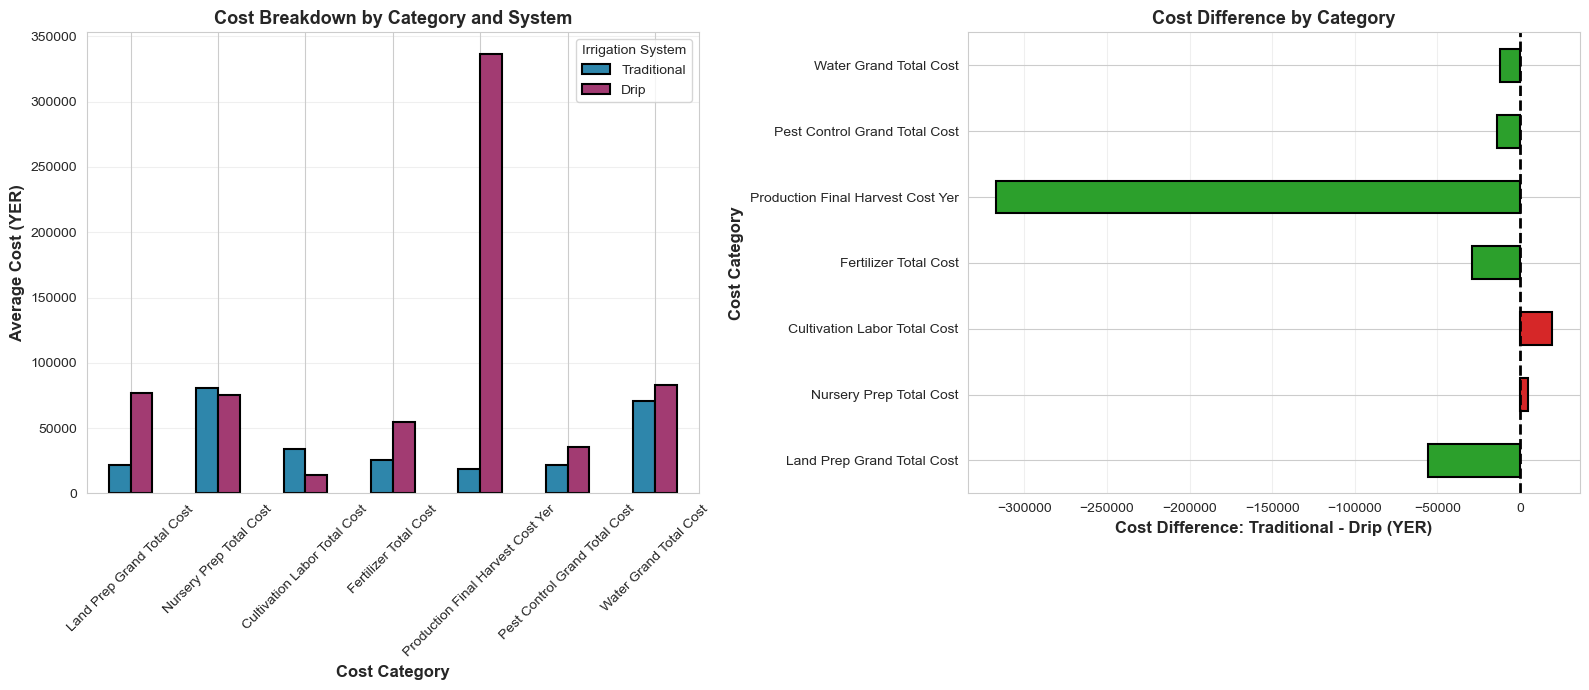

In [9]:
# Detailed breakdown by cost category
if irrigation_col in df.columns and len(systems) == 2:
    print("COST BREAKDOWN BY CATEGORY AND IRRIGATION SYSTEM")
    print("=" * 100)
    
    # Calculate mean for each cost category by system
    breakdown = df.groupby(irrigation_col)[existing_cost_cols].mean().T
    breakdown['difference'] = breakdown.iloc[:, 0] - breakdown.iloc[:, 1]
    breakdown['pct_diff'] = (breakdown['difference'] / breakdown.iloc[:, 1]) * 100
    
    # Rename columns for clarity
    breakdown.columns = [system1, system2, 'Difference', 'Pct_Diff']
    breakdown.index = [idx.replace('_', ' ').title() for idx in breakdown.index]
    
    display(breakdown.round(2))
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Grouped bar chart
    breakdown[[system1, system2]].plot(kind='bar', ax=axes[0], 
                                       color=['#2E86AB', '#A23B72'],
                                       edgecolor='black', linewidth=1.5)
    axes[0].set_xlabel('Cost Category', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Average Cost (YER)', fontsize=12, fontweight='bold')
    axes[0].set_title('Cost Breakdown by Category and System', 
                     fontsize=13, fontweight='bold')
    axes[0].legend(title='Irrigation System')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Difference chart
    colors_diff = ['#d62728' if x > 0 else '#2ca02c' for x in breakdown['Difference']]
    breakdown['Difference'].plot(kind='barh', ax=axes[1], color=colors_diff,
                                 edgecolor='black', linewidth=1.5)
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2)
    axes[1].set_xlabel(f'Cost Difference: {system1} - {system2} (YER)', 
                      fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Cost Category', fontsize=12, fontweight='bold')
    axes[1].set_title('Cost Difference by Category', fontsize=13, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 8. Statistical Significance Test

In [10]:
# T-test for total cost difference
if 'prediction' in locals():
    print("STATISTICAL SIGNIFICANCE TEST - TOTAL COST")
    print("=" * 100)
    
    t_stat, p_value = stats.ttest_ind(costs_system1, costs_system2)
    
    # Calculate Cohen's d
    pooled_std = np.sqrt(((len(costs_system1)-1)*costs_system1.var() + 
                          (len(costs_system2)-1)*costs_system2.var()) / 
                         (len(costs_system1)+len(costs_system2)-2))
    cohens_d = (costs_system1.mean() - costs_system2.mean()) / pooled_std
    
    print(f"\nt-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Cohen's d (effect size): {cohens_d:.4f}")
    
    print(f"\nInterpretation:")
    if p_value < 0.001:
        print(f"  ✓✓✓ HIGHLY SIGNIFICANT (p < 0.001)")
        print(f"  The cost difference is statistically significant with very strong evidence.")
    elif p_value < 0.01:
        print(f"  ✓✓ VERY SIGNIFICANT (p < 0.01)")
        print(f"  The cost difference is statistically significant with strong evidence.")
    elif p_value < 0.05:
        print(f"  ✓ SIGNIFICANT (p < 0.05)")
        print(f"  The cost difference is statistically significant.")
    else:
        print(f"  ✗ NOT SIGNIFICANT (p >= 0.05)")
        print(f"  The cost difference is not statistically significant.")
        print(f"  The systems have similar total costs.")
    
    # Effect size interpretation
    abs_d = abs(cohens_d)
    print(f"\nEffect Size:")
    if abs_d >= 0.8:
        print(f"  LARGE effect - The difference is practically significant")
    elif abs_d >= 0.5:
        print(f"  MEDIUM effect - The difference is moderately meaningful")
    elif abs_d >= 0.2:
        print(f"  SMALL effect - The difference is detectable but small")
    else:
        print(f"  NEGLIGIBLE effect - The difference is not practically significant")

STATISTICAL SIGNIFICANCE TEST - TOTAL COST

t-statistic: 1.6101
p-value: 0.1186
Cohen's d (effect size): 0.5879

Interpretation:
  ✗ NOT SIGNIFICANT (p >= 0.05)
  The cost difference is not statistically significant.
  The systems have similar total costs.

Effect Size:
  MEDIUM effect - The difference is moderately meaningful


## 9. Prediction Summary & Recommendations

In [11]:
# Summary report
if 'prediction' in locals():
    print("=" * 100)
    print("PREDICTION SUMMARY & RECOMMENDATIONS")
    print("=" * 100)
    
    print(f"\n📊 Key Findings:")
    print("-" * 100)
    
    # Determine which is cheaper
    cheaper_system = system2 if prediction['diff'] > 0 else system1
    expensive_system = system1 if prediction['diff'] > 0 else system2
    
    print(f"\n1. Cost Comparison:")
    print(f"   • {cheaper_system}: {min(mean1, mean2):,.2f} YER (LOWER COST) ✓")
    print(f"   • {expensive_system}: {max(mean1, mean2):,.2f} YER (HIGHER COST)")
    print(f"   • Difference: {abs(prediction['diff']):,.2f} YER ({abs(prediction['pct_diff']):.2f}%)")
    
    print(f"\n2. Prediction Confidence:")
    print(f"   • We are 95% confident the true cost difference is between:")
    print(f"     {prediction['ci_lower']:,.2f} and {prediction['ci_upper']:,.2f} YER")
    print(f"   • Margin of error: ±{abs(prediction['ci_upper'] - prediction['diff']):,.2f} YER")
    
    print(f"\n3. Statistical Significance:")
    if p_value < 0.05:
        print(f"   • The difference IS statistically significant (p = {p_value:.4f})")
        print(f"   • This difference is unlikely to be due to chance")
    else:
        print(f"   • The difference is NOT statistically significant (p = {p_value:.4f})")
        print(f"   • The systems have similar costs statistically")
    
    print(f"\n4. Cost Savings Potential:")
    if p_value < 0.05 and abs(prediction['diff']) > 0:
        total_farms = len(df)
        farms_expensive = len(df[df[irrigation_col] == expensive_system])
        
        if farms_expensive > 0:
            total_savings = abs(prediction['diff']) * farms_expensive
            print(f"   • If all {farms_expensive} farms using {expensive_system} switched to {cheaper_system}:")
            print(f"   • Potential total savings: {total_savings:,.2f} YER")
            print(f"   • Average savings per farm: {abs(prediction['diff']):,.2f} YER")
    else:
        print(f"   • No significant cost savings identified between systems")
    
    print(f"\n" + "=" * 100)
    print("RECOMMENDATIONS")
    print("=" * 100)
    
    if p_value < 0.05 and abs(cohens_d) >= 0.5:
        print(f"\n✓ STRONG RECOMMENDATION:")
        print(f"  • {cheaper_system} is significantly more cost-effective")
        print(f"  • Consider promoting {cheaper_system} adoption")
        print(f"  • Provide training/support for farmers to switch systems")
        print(f"  • Expected cost reduction: {abs(prediction['pct_diff']):.1f}% per farm")
    elif p_value < 0.05:
        print(f"\n○ MODERATE RECOMMENDATION:")
        print(f"  • {cheaper_system} has lower costs, but the difference is small")
        print(f"  • Consider other factors (water efficiency, production, labor)")
        print(f"  • Cost savings may not justify switching for all farmers")
    else:
        print(f"\n○ NO CLEAR COST ADVANTAGE:")
        print(f"  • Both systems have similar total costs")
        print(f"  • Decision should be based on other factors:")
        print(f"    - Production quantity")
        print(f"    - Water availability")
        print(f"    - Crop type compatibility")
        print(f"    - Local infrastructure")
    
    print(f"\n" + "=" * 100)

PREDICTION SUMMARY & RECOMMENDATIONS

📊 Key Findings:
----------------------------------------------------------------------------------------------------

1. Cost Comparison:
   • Drip: 272,126.67 YER (LOWER COST) ✓
   • Traditional: 653,821.33 YER (HIGHER COST)
   • Difference: 381,694.67 YER (140.26%)

2. Prediction Confidence:
   • We are 95% confident the true cost difference is between:
     -82,957.37 and 846,346.70 YER
   • Margin of error: ±464,652.03 YER

3. Statistical Significance:
   • The difference is NOT statistically significant (p = 0.1186)
   • The systems have similar costs statistically

4. Cost Savings Potential:
   • No significant cost savings identified between systems

RECOMMENDATIONS

○ NO CLEAR COST ADVANTAGE:
  • Both systems have similar total costs
  • Decision should be based on other factors:
    - Production quantity
    - Water availability
    - Crop type compatibility
    - Local infrastructure



## 10. Save Predictions to Excel

In [12]:
# Create prediction report
if 'prediction' in locals():
    prediction_report = pd.DataFrame([
        {'Metric': f'{system1} - Mean Total Cost (YER)', 'Value': f"{mean1:,.2f}"},
        {'Metric': f'{system2} - Mean Total Cost (YER)', 'Value': f"{mean2:,.2f}"},
        {'Metric': 'Predicted Difference (YER)', 'Value': f"{prediction['diff']:,.2f}"},
        {'Metric': 'Percentage Difference (%)', 'Value': f"{abs(prediction['pct_diff']):.2f}"},
        {'Metric': '95% CI - Lower Bound (YER)', 'Value': f"{prediction['ci_lower']:,.2f}"},
        {'Metric': '95% CI - Upper Bound (YER)', 'Value': f"{prediction['ci_upper']:,.2f}"},
        {'Metric': 'p-value', 'Value': f"{p_value:.4f}"},
        {'Metric': 'Statistically Significant?', 'Value': 'Yes' if p_value < 0.05 else 'No'},
        {'Metric': "Cohen's d", 'Value': f"{cohens_d:.4f}"},
        {'Metric': 'More Cost-Effective System', 'Value': cheaper_system}
    ])
    
    # Save to Excel
    output_file = 'Cost_Prediction_Report.xlsx'
    
    with pd.ExcelWriter(output_file) as writer:
        prediction_report.to_excel(writer, sheet_name='Prediction Summary', index=False)
        breakdown.to_excel(writer, sheet_name='Cost Breakdown')
        systems_stats.to_excel(writer, sheet_name='System Statistics')
    
    print(f"✓ Prediction report saved to: {output_file}")
    print(f"\nReport includes 3 sheets:")
    print(f"  1. Prediction Summary")
    print(f"  2. Cost Breakdown by Category")
    print(f"  3. System Statistics")

✓ Prediction report saved to: Cost_Prediction_Report.xlsx

Report includes 3 sheets:
  1. Prediction Summary
  2. Cost Breakdown by Category
  3. System Statistics


---

## 📌 Understanding the Predictions

### What We Predicted:
- **Point Estimate**: The expected average cost difference between irrigation systems
- **95% Confidence Interval**: Range where we're 95% confident the true difference lies
- **Statistical Significance**: Whether the difference is real or due to chance

### How to Use These Predictions:
1. **Decision Making**: Choose the more cost-effective irrigation system
2. **Budgeting**: Estimate cost savings from system adoption
3. **Policy**: Support data-driven agricultural policies
4. **Farmer Education**: Inform farmers about cost implications

### Important Notes:
- Predictions are based on current sample data (n=30)
- Larger samples would increase prediction accuracy
- Consider combining with production analysis for full ROI
- Local conditions may affect actual costs

---

**End of Cost Prediction Analysis** 🎉